In [16]:
import numpy as np
import pandas as pd
import os
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [23]:

for dataset in os.listdir("Biodiversity"):
    if "xlsx" in dataset:
        df = pd.read_excel('Biodiversity/'+dataset)
        
       
        
        
    else:
        df = pd.read_csv('Biodiversity/'+dataset)

    
    train_missing= missing_values_table(df)
    

    print(dataset)
    # print(df.isnull().sum(),"cec")
    # print(df.shape)
    percent_missing = df.isnull().sum() * 100 / len(df)
    print(percent_missing)
    # print(df.describe())
   

Your selected dataframe has 68 columns.
There are 68 columns that have missing values.
Agricultural Land.xlsx
Your selected dataframe has 13 columns.
There are 0 columns that have missing values.
deforestation-co2-trade-by-product.csv
Your selected dataframe has 67 columns.
There are 67 columns that have missing values.
Forest Area.xlsx
Your selected dataframe has 4 columns.
There are 1 columns that have missing values.
GHG emissions per kilogram produced.csv
Your selected dataframe has 6 columns.
There are 1 columns that have missing values.
global-living-planet-index.csv
Your selected dataframe has 4 columns.
There are 1 columns that have missing values.
living-planet-index-by-region.csv
Your selected dataframe has 68 columns.
There are 68 columns that have missing values.
Tree Cover Loss.xlsx
Your selected dataframe has 4 columns.
There are 1 columns that have missing values.
wheat-yields.csv


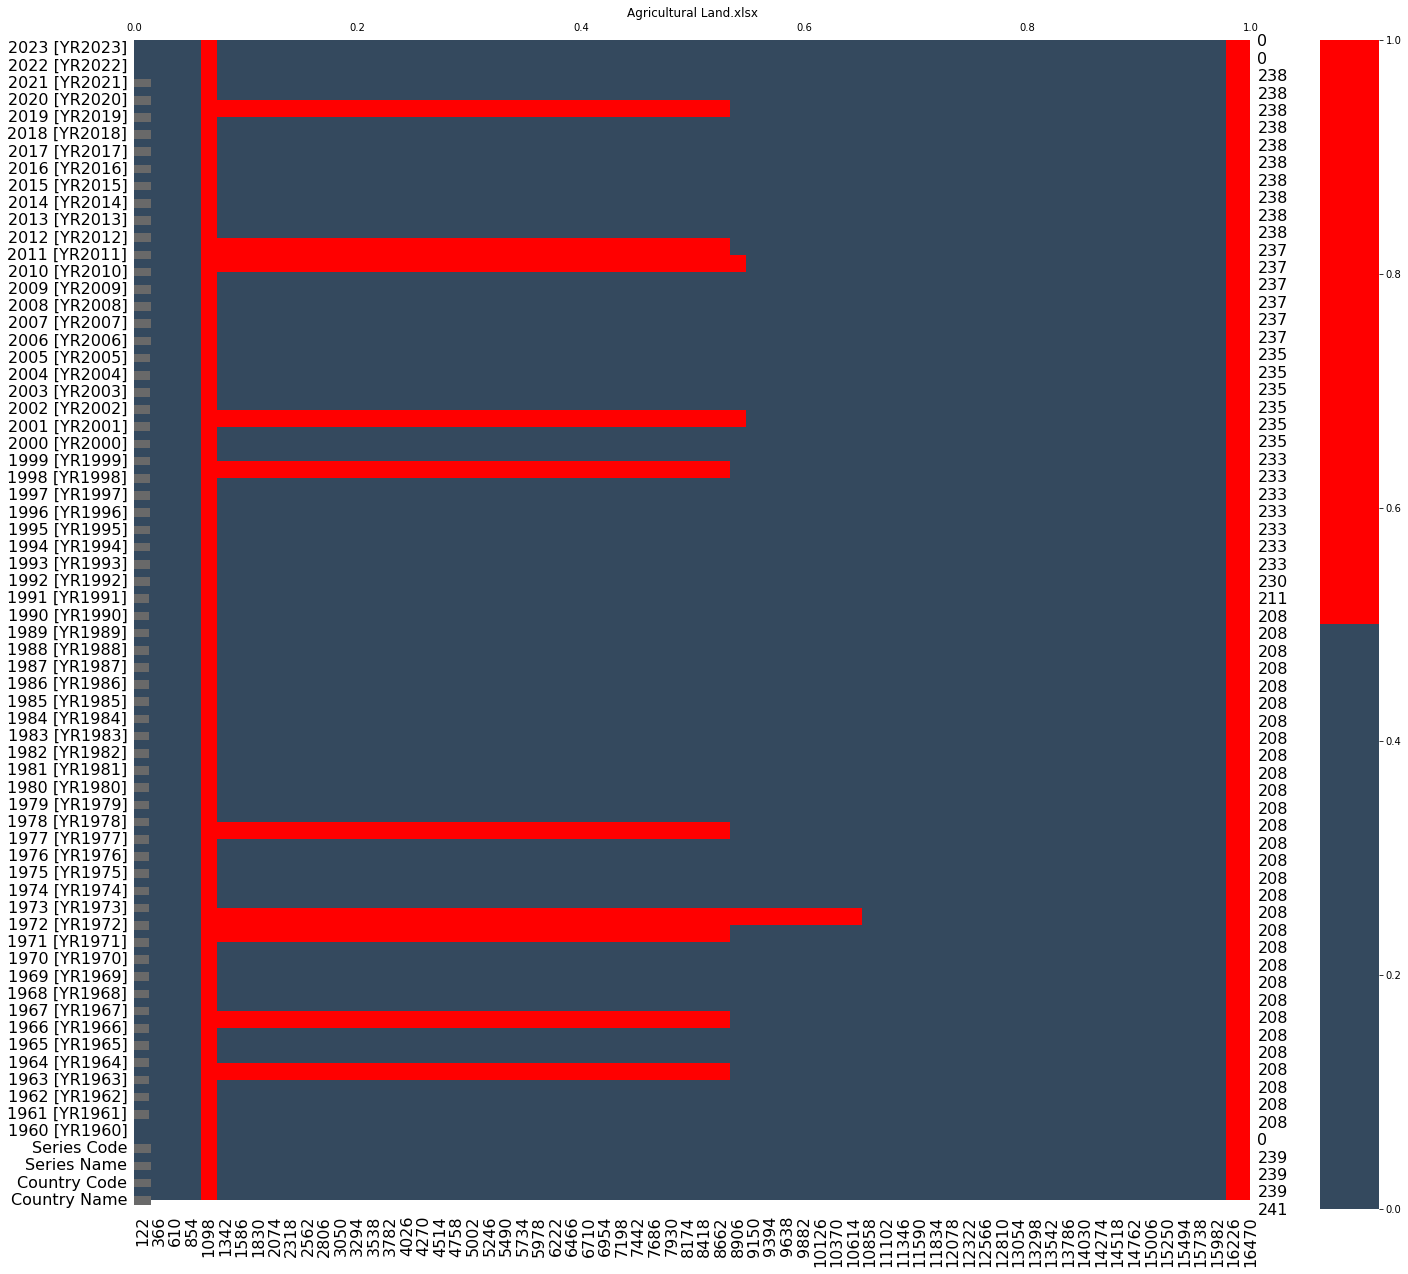

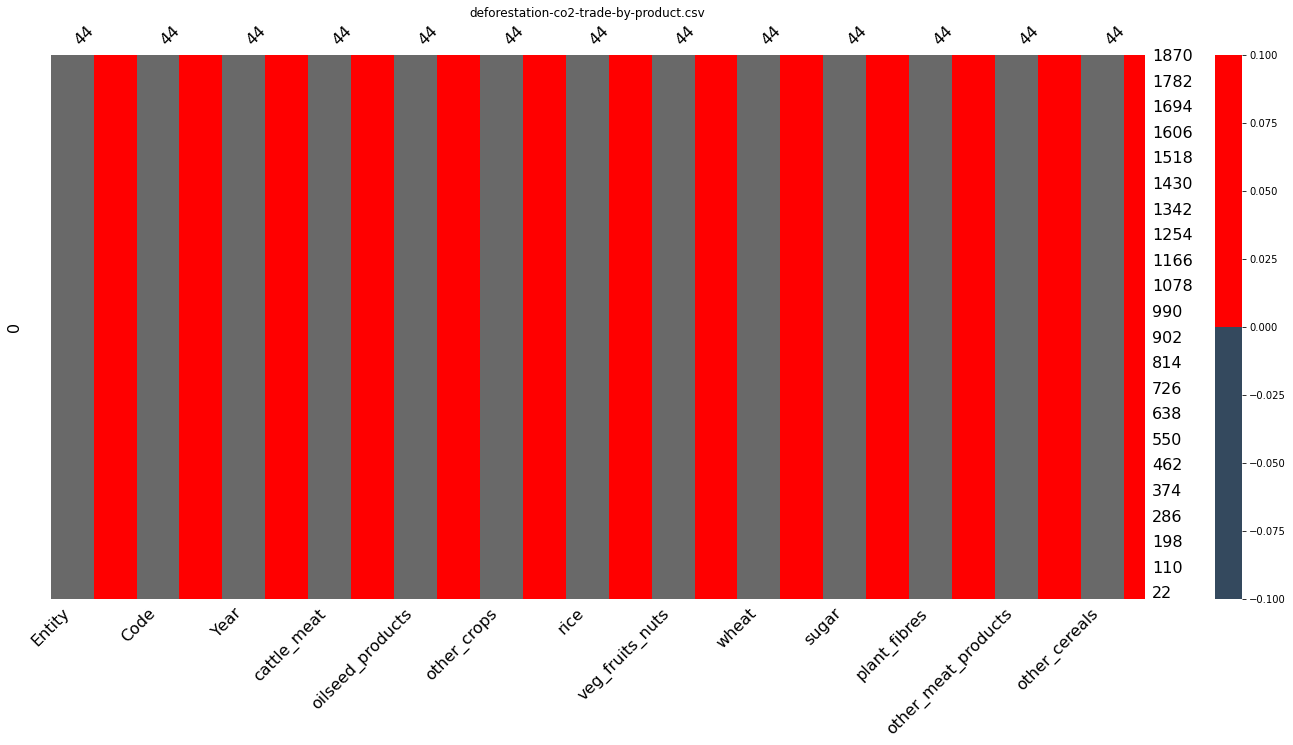

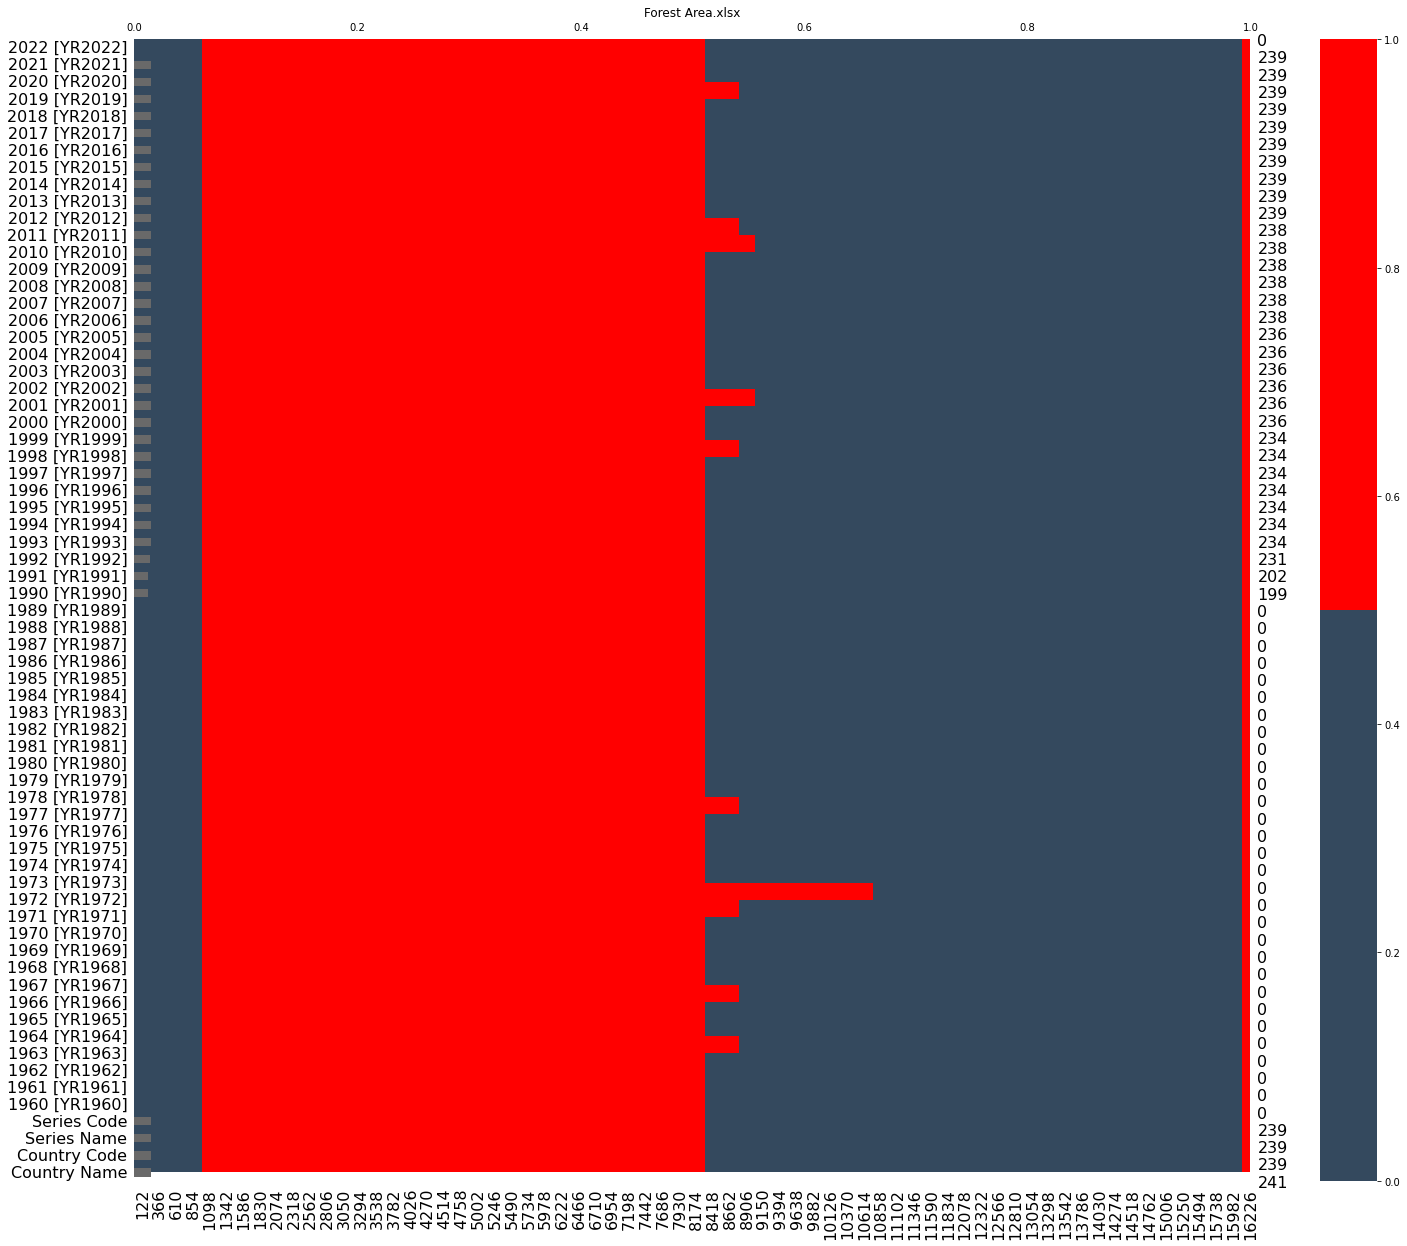

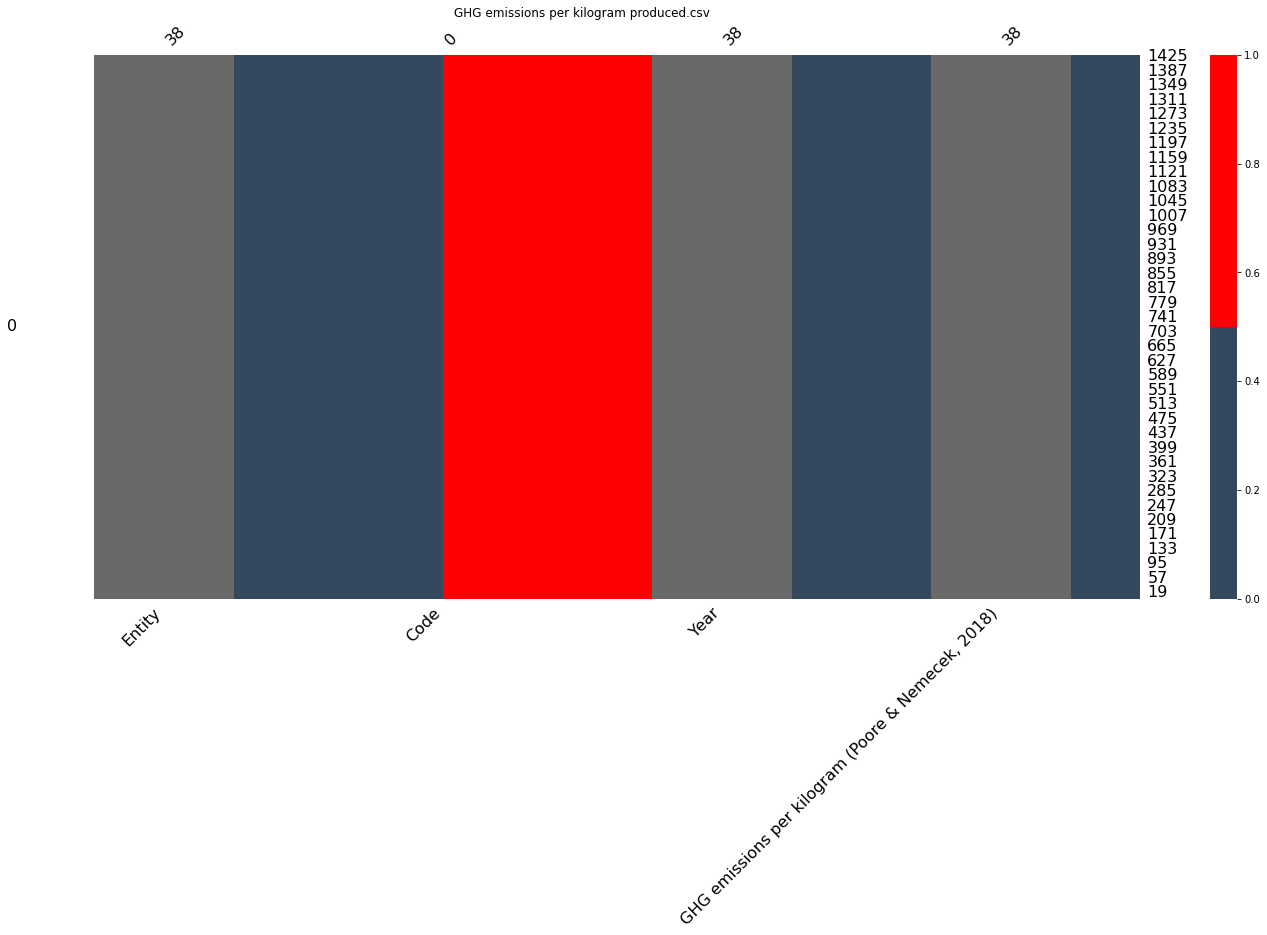

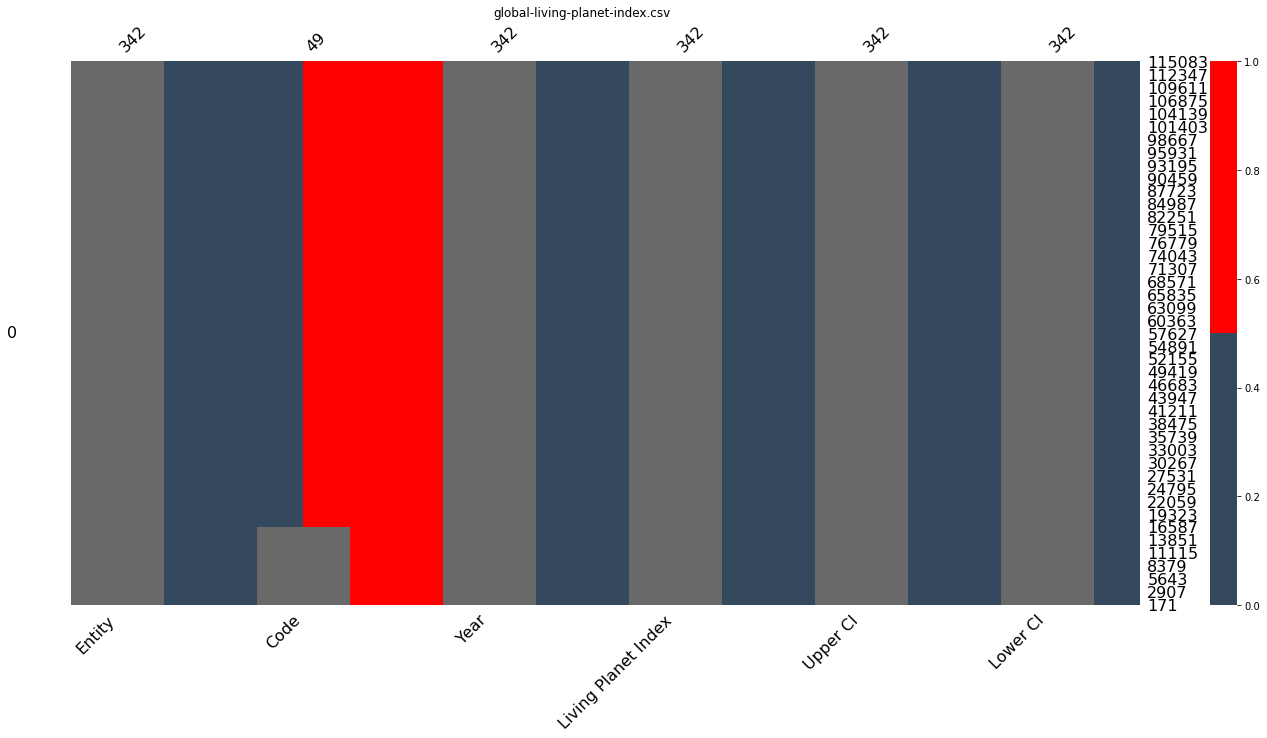

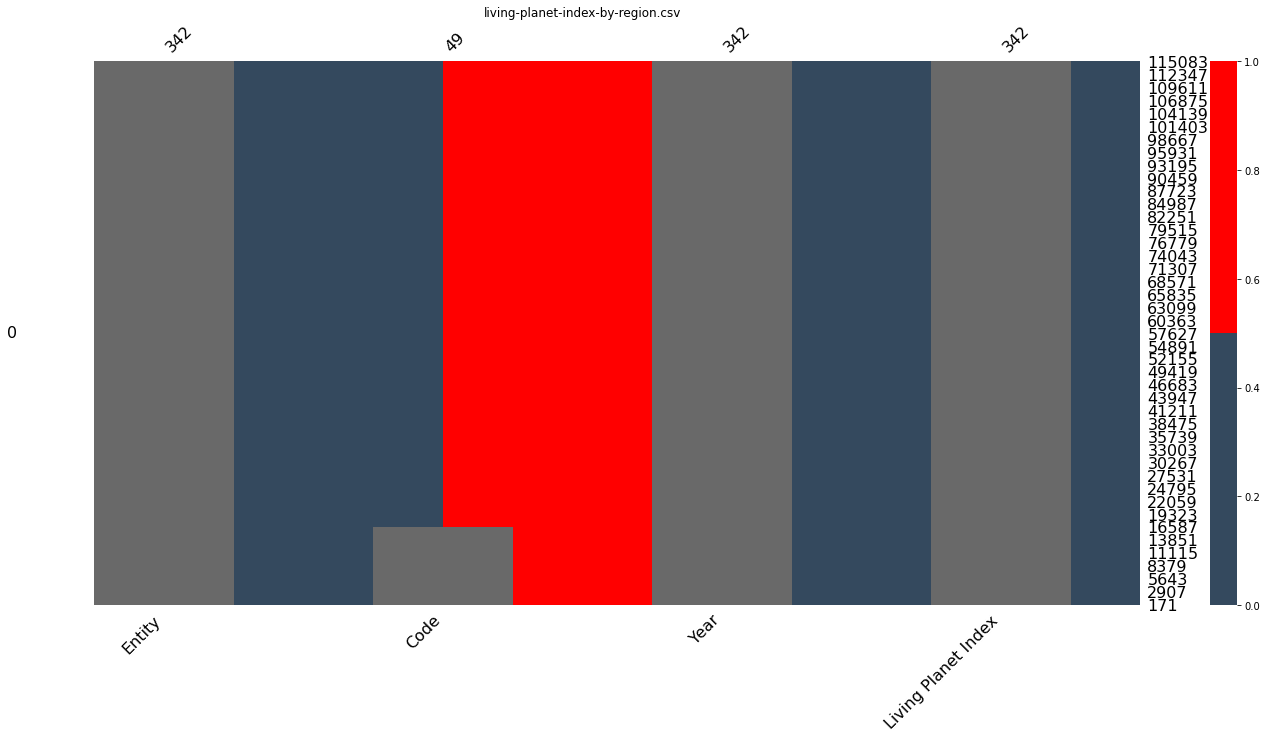

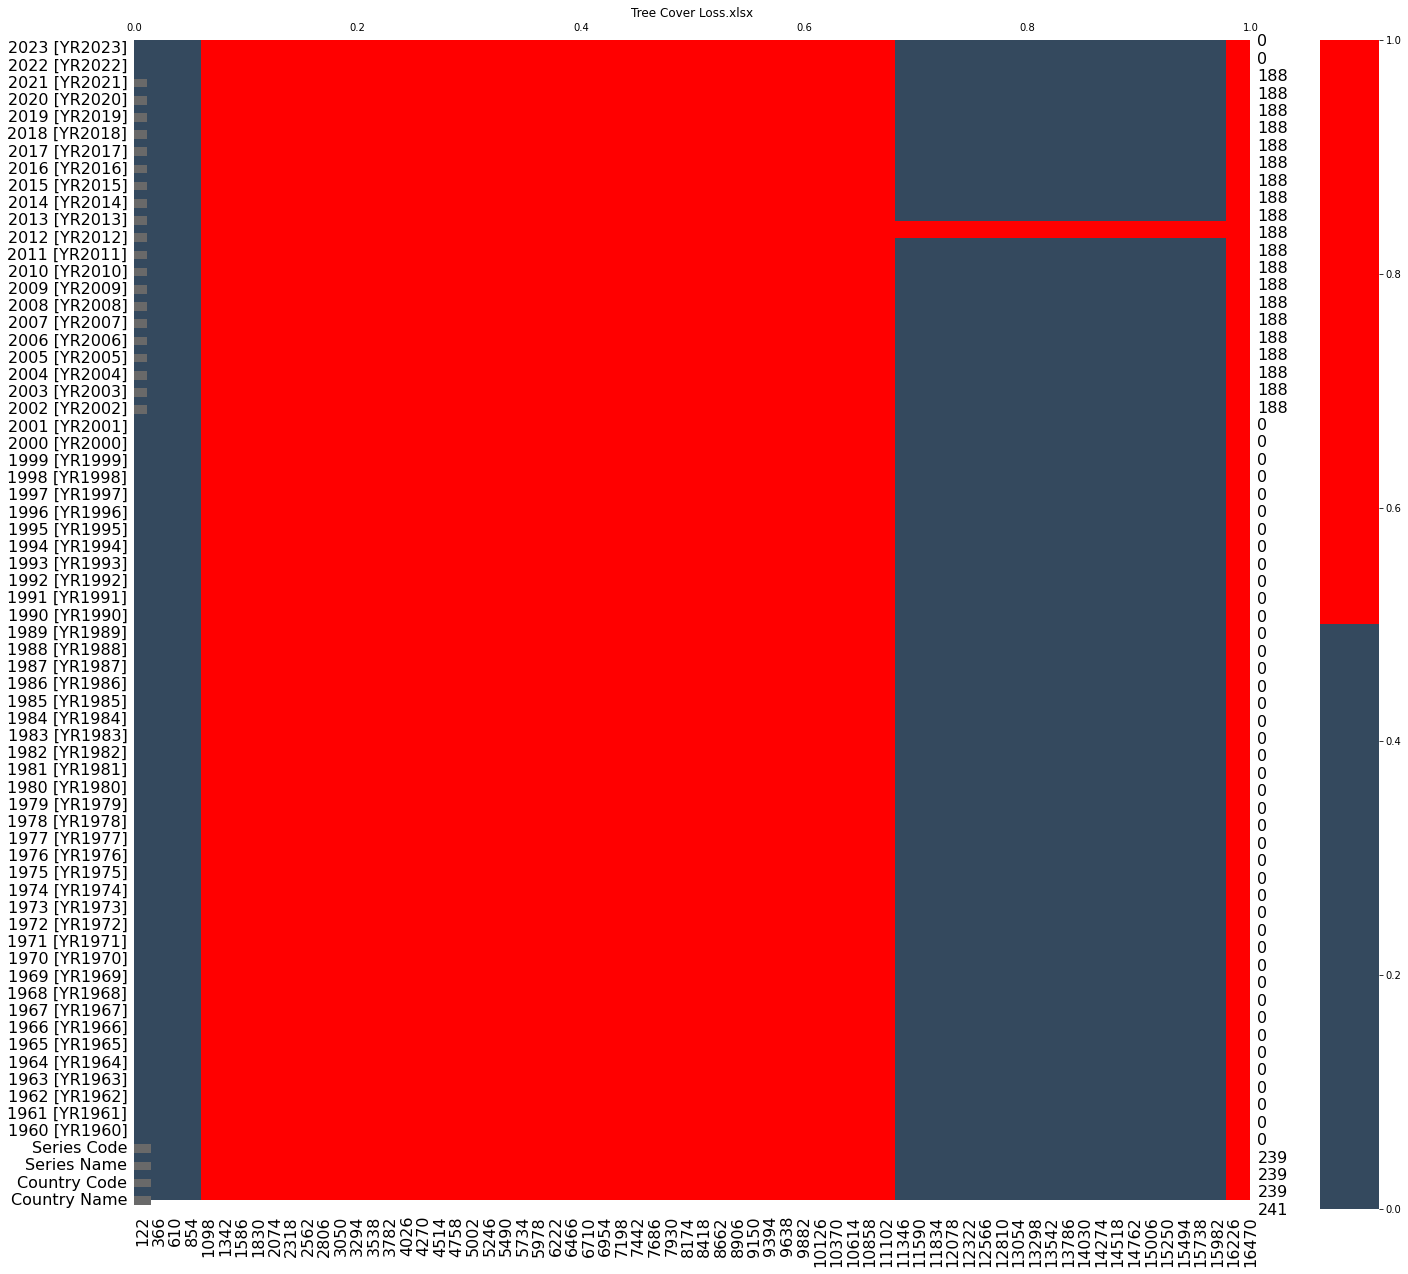

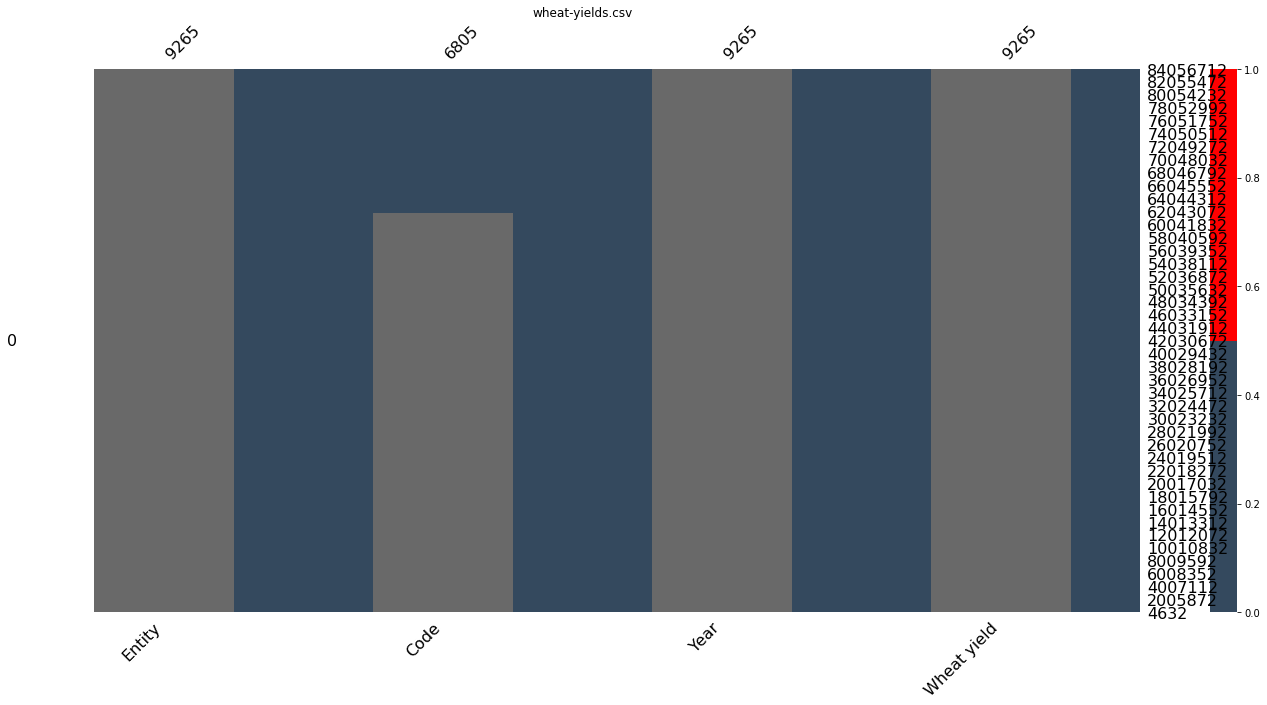

In [19]:
for dataset in os.listdir("Biodiversity"):
    if "xlsx" in dataset:
        df = pd.read_excel('Biodiversity/'+dataset)
        
       
        
        
    else:
        df = pd.read_csv('Biodiversity/'+dataset)
    df[df ==".."] = np.nan
    plt.figure(figsize=(18,8))
    plt.title(dataset)
    colours = ['#34495E','red'] 
    sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))
    plt.savefig("visuals/Heat_map_of_missing_"+dataset+".png")
    fig =msno.bar(df)
    fig_copy = fig.get_figure()
    fig_copy.savefig("visuals/Bar_of_missing_"+dataset+'.png', bbox_inches = 'tight')
